<a href="https://colab.research.google.com/github/rosie0520486/superstore/blob/main/zomato0523_rosie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

＃データ前処理

In [ ]:
import pandas as pd
import numpy as np

# Data quality check function
def check_data_quality(df, X, y):
    print("[1] Dataset shape (rows, columns):")
    print(df.shape)

    print("\n[2] Missing values summary:")
    nulls = df.isnull().sum()
    if nulls.sum() == 0:
        print("→ No missing values")
    else:
        print(nulls[nulls > 0].sort_values(ascending=False))

    print("\n[3] Data type summary:")
    print(df.dtypes.value_counts())

    print("\n[4] Summary statistics (numeric features):")
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_cols.empty:
        print(numeric_cols.describe().T[['mean', 'std', 'min', 'max']].round(2))
    else:
        print("No numeric columns to summarize.")

    print("\n[5] Target variable distribution (y):")
    print(y.value_counts())
    print("→ Class proportion (%):")
    print((y.value_counts(normalize=True) * 100).round(2))

    print("\n[6] Feature matrix dimensions (X):")
    print(f"X.shape = {X.shape}")
    print("→ First 5 features:", X.columns[:5].tolist())


# Preprocessing function
def preprocess_zomato_data(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

    selected_columns = [
        'book_table', 'online_order', 'location', 'rest_type',
        'cuisines', 'approx_cost(for_two_people)', 'rate'
    ]
    df = df[selected_columns].copy()

    df.dropna(subset=['book_table'], inplace=True)
    df.loc[:, 'book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
    df.loc[:, 'online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].astype(str)
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].str.extract(r'(\d+\.?\d*)')
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].astype(float)
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
        df['approx_cost(for_two_people)'].mean()
    )

    df.loc[:, 'rate'] = df['rate'].replace(['NEW', '-', ''], None)
    df.loc[:, 'rate'] = df['rate'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
    df.loc[:, 'rate'] = df['rate'].fillna(df['rate'].mean())

    for col in ['location', 'rest_type', 'cuisines']:
        df.loc[:, col] = df[col].fillna('Unknown')
        df = pd.get_dummies(df, columns=[col], drop_first=True)

    X = df.drop('book_table', axis=1)
    y = df['book_table']
    return X, y, df

# File loading and execution
file_path = '/content/drive/My Drive/zomato.csv'
df_raw = pd.read_csv(file_path, low_memory=False)

X, y, df_processed = preprocess_zomato_data(df_raw)
check_data_quality(df_processed, X, y)


<ipython-input-2-acebf4cd019c>:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
<ipython-input-2-acebf4cd019c>:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'rate'] = df['rate'].fillna(df['rate'].mean())


[1] Dataset shape (rows, columns):
(55943, 11381)

[2] Missing values summary:
book_table      4226
online_order    4226
dtype: int64

[3] Data type summary:
bool      11377
object        4
Name: count, dtype: int64

[4] Summary statistics (numeric features):
No numeric columns to summarize.

[5] Target variable distribution (y):
book_table
0.0    45268
1.0     6449
Name: count, dtype: int64
→ Class proportion (%):
book_table
0.0    87.53
1.0    12.47
Name: proportion, dtype: float64

[6] Feature matrix dimensions (X):
X.shape = (55943, 11380)
→ First 5 features: ['online_order', 'approx_cost(for_two_people)', 'rate', 'location_ ""RATED\\n  ....this place has this vibes of old Banglore pub', 'location_ ""RATED\\n  1-Ambience good but could have been managed better\\n\\n2- Food was delicious\\n\\n3- Service was pathetic. Every time you need to call them for water']


＃前処理２

In [ ]:
import pandas as pd
import numpy as np

# --- 1. data quality check
def check_data_quality(df, X, y):
    print("[1] Dataset shape (rows, columns):")
    print(df.shape)

    print("\n[2] Missing values summary:")
    nulls = df.isnull().sum()
    if nulls.sum() == 0:
        print("→ No missing values")
    else:
        print(nulls[nulls > 0].sort_values(ascending=False))

    print("\n[3] Data type summary:")
    print(df.dtypes.value_counts())

    print("\n[4] Summary statistics (numeric features):")
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_cols.empty:
        print(numeric_cols.describe().T[['mean', 'std', 'min', 'max']].round(2))
    else:
        print("No numeric columns to summarize.")

    print("\n[5] Target variable distribution (y):")
    print(y.value_counts())
    print("→ Class proportion (%):")
    print((y.value_counts(normalize=True) * 100).round(2))

    print("\n[6] Feature matrix dimensions (X):")
    print(f"X.shape = {X.shape}")
    print("→ First 5 features:", X.columns[:5].tolist())

# --- 2. 前処理
def preprocess_zomato_data(df):
    # Clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

    # Select key columns
    selected_columns = [
        'book_table', 'online_order', 'location', 'rest_type',
        'cuisines', 'approx_cost(for_two_people)', 'rate'
    ]
    df = df[selected_columns].copy()

    # Drop rows with missing target or key features
    df.dropna(subset=['book_table', 'online_order'], inplace=True)

    # Convert to binary (1 = Yes, 0 = No)
    df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
    df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

    # Clean and convert approx cost
    df['approx_cost(for_two_people)'] = (
        df['approx_cost(for_two_people)']
        .astype(str)
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )
    df['approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
        df['approx_cost(for_two_people)'].mean()
    )

    # Clean and convert rate
    df['rate'] = df['rate'].astype(str).replace(['NEW', '-', ''], None)
    df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)', expand=False)
    df['rate'] = df['rate'].astype(float)
    df['rate'] = df['rate'].fillna(df['rate'].mean())

    # Reduce high-cardinality categorical features
    for col in ['location', 'rest_type', 'cuisines']:
        top_categories = df[col].value_counts().nlargest(30).index
        df[col] = df[col].where(df[col].isin(top_categories), other='Other')
        df[col] = df[col].fillna('Other')

    # One-hot encode cleaned categorical columns
    df = pd.get_dummies(df, columns=['location', 'rest_type', 'cuisines'], drop_first=True)

    # Split into features and target
    X = df.drop('book_table', axis=1)
    y = df['book_table']
    return X, y, df

# --- 3. ファイルよぶと実行 ---
file_path = '/content/drive/My Drive/zomato.csv'
df_raw = pd.read_csv(file_path, low_memory=False)

X, y, df_processed = preprocess_zomato_data(df_raw)
check_data_quality(df_processed, X, y)


[1] Dataset shape (rows, columns):
(55943, 94)

[2] Missing values summary:
book_table      4226
online_order    4226
dtype: int64

[3] Data type summary:
bool       90
float64     4
Name: count, dtype: int64

[4] Summary statistics (numeric features):
                               mean     std  min     max
book_table                     0.12    0.33  0.0     1.0
online_order                   0.59    0.49  0.0     1.0
approx_cost(for_two_people)  349.98  229.11  0.0  2015.0
rate                           3.70    0.42  0.5     5.0

[5] Target variable distribution (y):
book_table
0.0    45268
1.0     6449
Name: count, dtype: int64
→ Class proportion (%):
book_table
0.0    87.53
1.0    12.47
Name: proportion, dtype: float64

[6] Feature matrix dimensions (X):
X.shape = (55943, 93)
→ First 5 features: ['online_order', 'approx_cost(for_two_people)', 'rate', 'location_Banashankari', 'location_Banaswadi']


#holdout

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure no missing values in y and corresponding rows in X
X_clean = X[y.notna()]
y_clean = y[y.notna()]

# Split into training and test sets (80% train, 20% test), preserving class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean  # maintain class ratio in both sets
)

# Check results
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape    :", X_test.shape, y_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True).round(3))
print("Test class distribution:\n", y_test.value_counts(normalize=True).round(3))


Training set shape: (41373, 93) (41373,)
Test set shape    : (10344, 93) (10344,)
Train class distribution:
 book_table
0.0    0.875
1.0    0.125
Name: proportion, dtype: float64
Test class distribution:
 book_table
0.0    0.875
1.0    0.125
Name: proportion, dtype: float64


#クラス分布

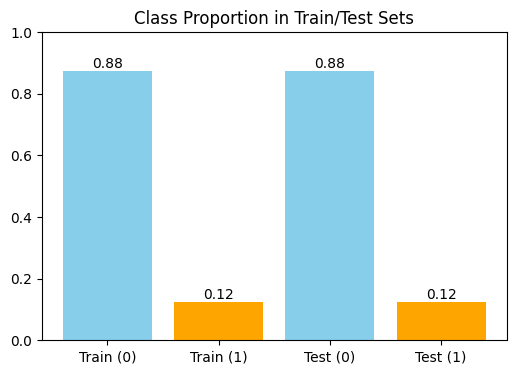

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for train/test class balance
plt.figure(figsize=(6, 4))
bars = plt.bar(['Train (0)', 'Train (1)', 'Test (0)', 'Test (1)'],
        [
            (y_train == 0).mean(),
            (y_train == 1).mean(),
            (y_test == 0).mean(),
            (y_test == 1).mean()
        ],
        color=['skyblue', 'orange', 'skyblue', 'orange']
)
plt.title('Class Proportion in Train/Test Sets')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}", ha='center')
plt.show()


#ベースラインモデル

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict all 0s (majority class)
y_pred_baseline = np.zeros_like(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_baseline)

# Output
print("=== Baseline Model (Predict All 0) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (for reference only)")


=== Baseline Model (Predict All 0) ===
Accuracy : 0.8753
F1 Score : 0.0000
MAE      : 0.1247
RMSE     : 0.3531
R²       : -0.1425 (for reference only)


＃logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Define the logistic regression model (handle class imbalance)
logreg = LogisticRegression(
    class_weight='balanced',   # give more weight to minority class
    max_iter=1000,
    random_state=42
)

# 2. Train the model
logreg.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = logreg.predict(X_test)

# 4. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 5. Print metrics
print("=== Logistic Regression Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (for reference only)")

# 6. Confusion matrix & classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression Performance ===
Accuracy : 0.8618
F1 Score : 0.6282
MAE      : 0.1382
RMSE     : 0.3718
R²       : -0.2665 (for reference only)

Confusion Matrix:
[[7706 1348]
 [  82 1208]]

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0     0.9895    0.8511    0.9151      9054
         1.0     0.4726    0.9364    0.6282      1290

    accuracy                         0.8618     10344
   macro avg     0.7310    0.8938    0.7716     10344
weighted avg     0.9250    0.8618    0.8793     10344



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#改善

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
import numpy as np

# 1. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model with higher iteration limit
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=3000,
    random_state=42
)

# 3. Train the model
logreg.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Logistic Regression (Scaled & Converged) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression (Scaled & Converged) ===
Accuracy : 0.8619
F1 Score : 0.6276
MAE      : 0.1381
RMSE     : 0.3717
R²       : -0.2656 (reference only)

Confusion Matrix:
[[7711 1343]
 [  86 1204]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9890    0.8517    0.9152      9054
         1.0     0.4727    0.9333    0.6276      1290

    accuracy                         0.8619     10344
   macro avg     0.7308    0.8925    0.7714     10344
weighted avg     0.9246    0.8619    0.8793     10344



#ランダムフォレスト

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. モデル　定義（クラス　調整）
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',   # 少数修正
    random_state=42,
    n_jobs=-1
)

# 2. モデル学習
rf_model.fit(X_train, y_train)

# 3. 予測
y_pred_rf = rf_model.predict(X_test)

# 4. 指標計算
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

# 5. プリント
print("=== Random Forest Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))


=== Random Forest Performance ===
Accuracy : 0.9830
F1 Score : 0.9348
MAE      : 0.0170
RMSE     : 0.1304
R²       : 0.8441 (reference only)

Confusion Matrix:
[[8907  147]
 [  29 1261]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9968    0.9838    0.9902      9054
         1.0     0.8956    0.9775    0.9348      1290

    accuracy                         0.9830     10344
   macro avg     0.9462    0.9806    0.9625     10344
weighted avg     0.9841    0.9830    0.9833     10344



#xgboost

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. データ変更
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # 불균형 보정
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 2. モデル学習
xgb_model.fit(X_train, y_train)

# 3. 予測
y_pred_xgb = xgb_model.predict(X_test)

# 4. 評価指標計算
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

# 5. プリント
print("=== XGBoost Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost Performance ===
Accuracy : 0.9284
F1 Score : 0.7702
MAE      : 0.0716
RMSE     : 0.2676
R²       : 0.3437 (reference only)

Confusion Matrix:
[[8361  693]
 [  48 1242]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9943    0.9235    0.9576      9054
         1.0     0.6419    0.9628    0.7702      1290

    accuracy                         0.9284     10344
   macro avg     0.8181    0.9431    0.8639     10344
weighted avg     0.9503    0.9284    0.9342     10344



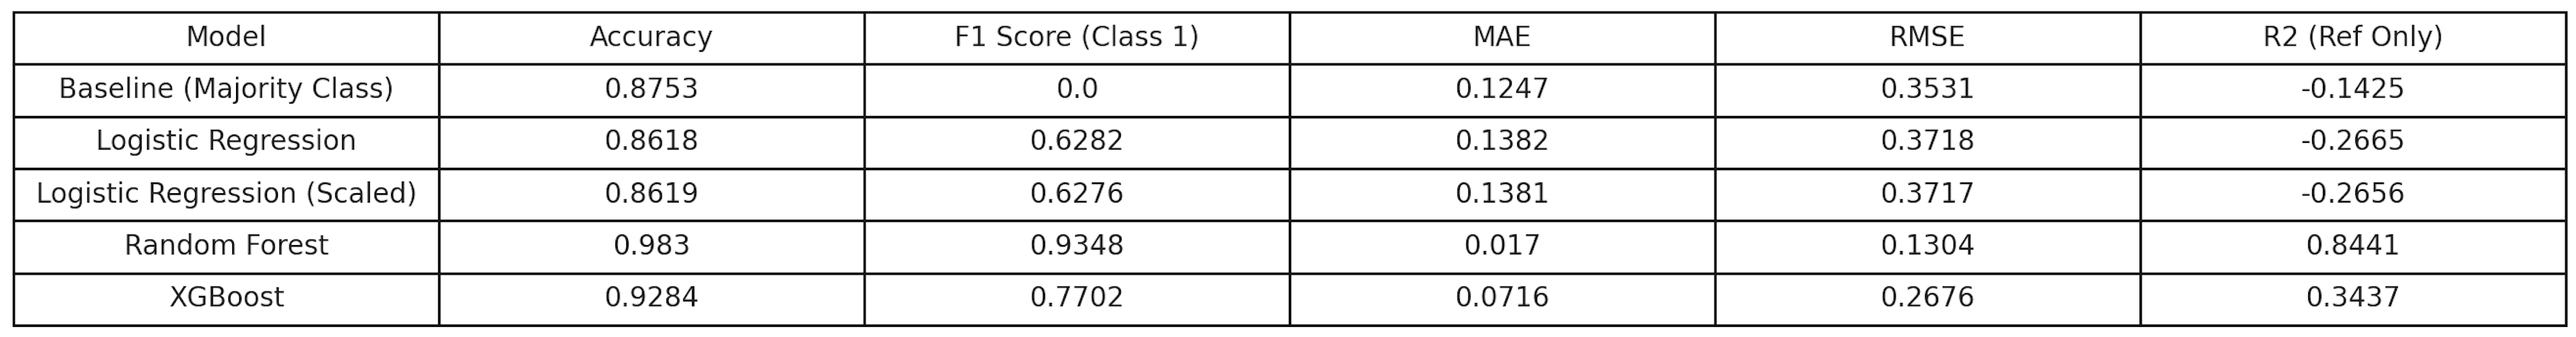

#モデル比較

<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


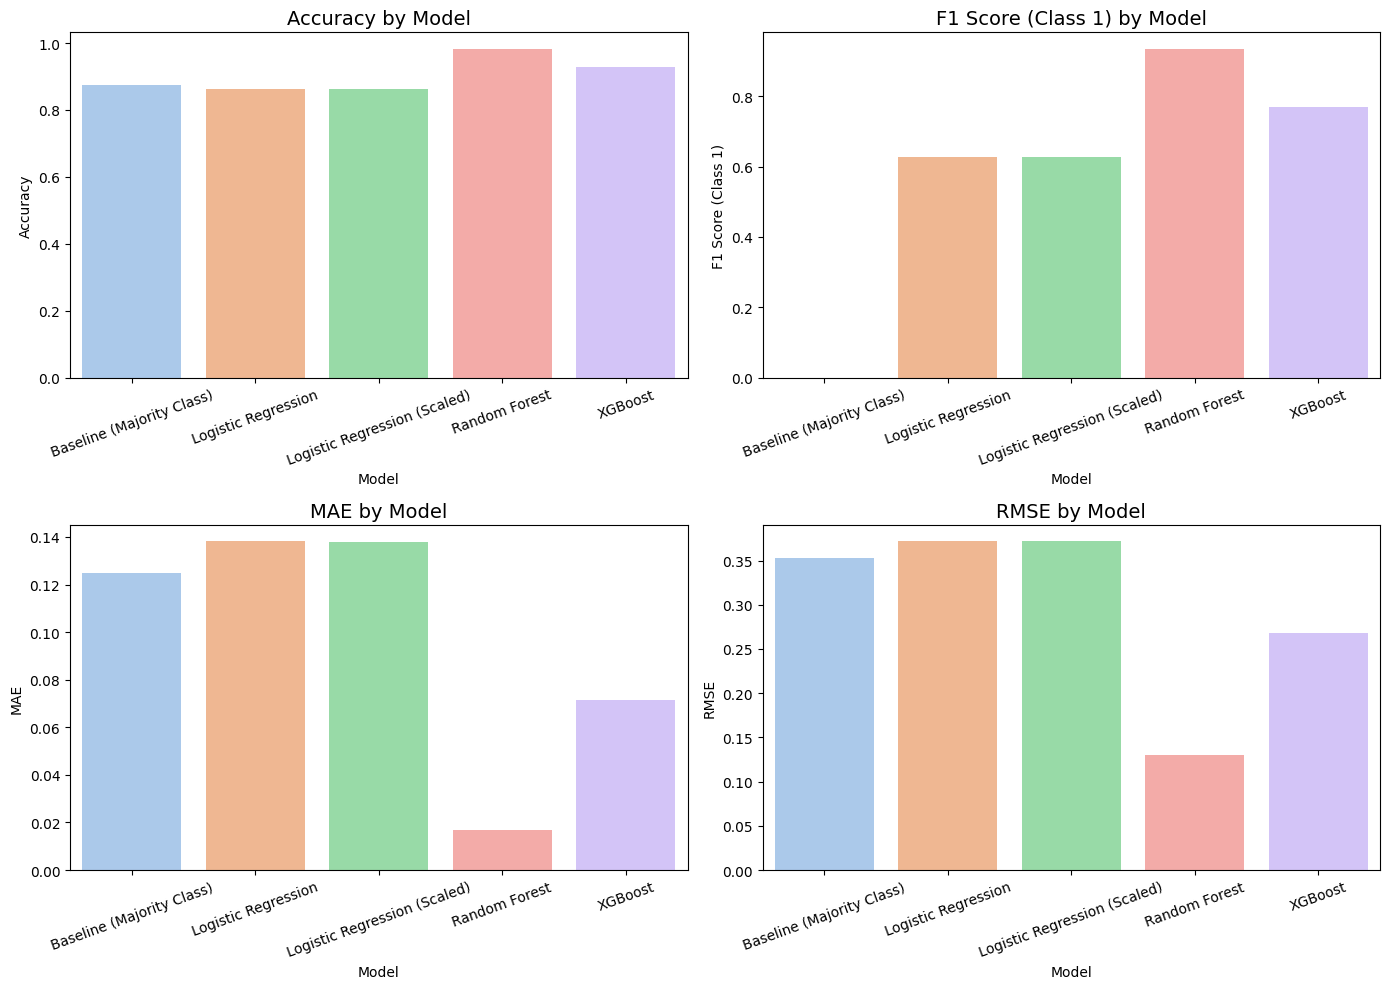

In [ ]:
import pandas as pd

model_results = pd.DataFrame({
    "Model": [
        "Baseline (Majority Class)",
        "Logistic Regression",
        "Logistic Regression (Scaled)",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        0.8753,
        0.8618,
        0.8619,
        0.9830,
        0.9284
    ],
    "F1 Score (Class 1)": [
        0.0000,
        0.6282,
        0.6276,
        0.9348,
        0.7702
    ],
    "MAE": [
        0.1247,
        0.1382,
        0.1381,
        0.0170,
        0.0716
    ],
    "RMSE": [
        0.3531,
        0.3718,
        0.3717,
        0.1304,
        0.2676
    ],
    "R2 (Ref Only)": [
        -0.1425,
        -0.2665,
        -0.2656,
        0.8441,
        0.3437
    ]
})

import matplotlib.pyplot as plt
import seaborn as sns

#  DataFrame: model_results
metrics_to_plot = ["Accuracy", "F1 Score (Class 1)", "MAE", "RMSE"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    sns.barplot(
        x="Model",
        y=metric,
        data=model_results,
        ax=axes[idx],
        palette="pastel"
    )
    axes[idx].set_title(f"{metric} by Model", fontsize=14)
    axes[idx].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


＃Confusion Matrix

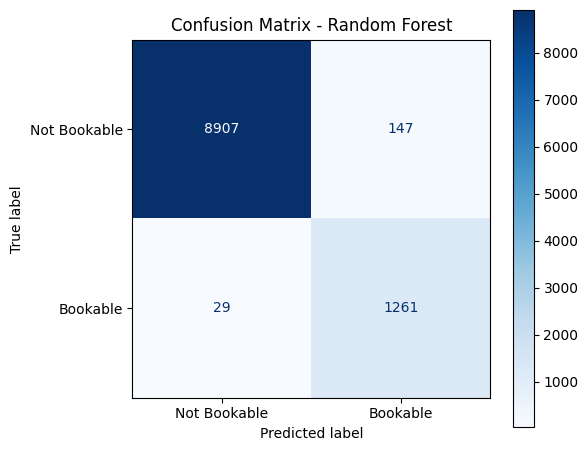

<ipython-input-3-c7e8f1a5c349>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importances.values, y=perm_importances.index, palette="crest")


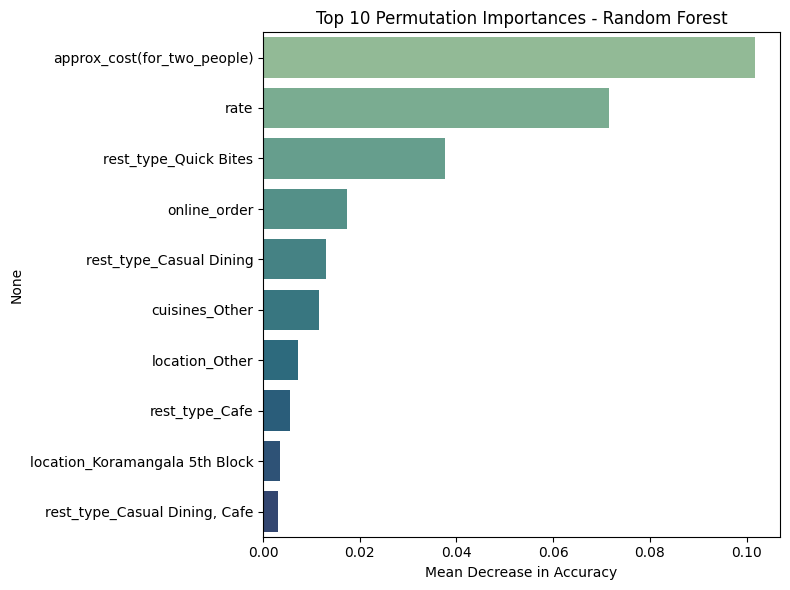

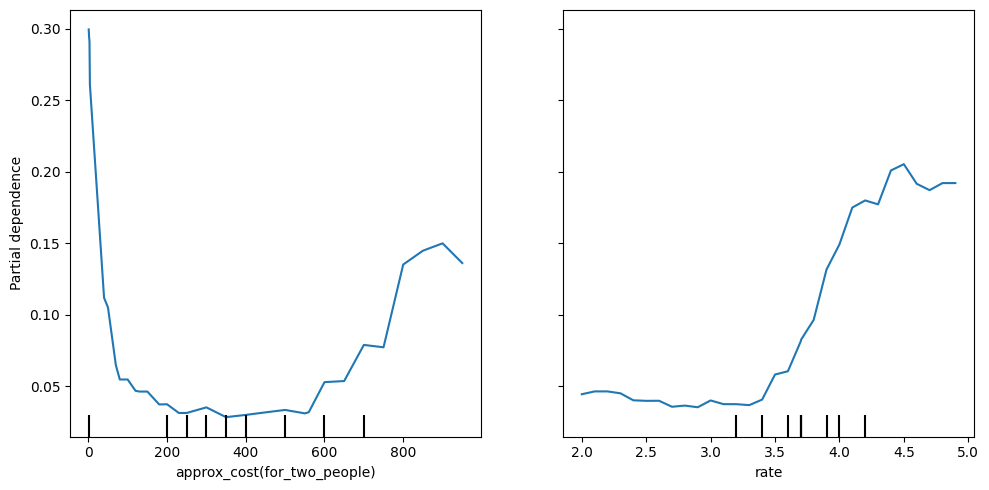

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 2. prediction
y_pred_rf = rf_model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Bookable", "Bookable"])
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# 4. Permutation Importance
perm_result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm_result.importances_mean, index=X_test.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=perm_importances.values, y=perm_importances.index, palette="crest")
plt.title("Top 10 Permutation Importances - Random Forest")
plt.xlabel("Mean Decrease in Accuracy")
plt.tight_layout()
plt.show()

# 5. Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    rf_model, X_test,
    features=["approx_cost(for_two_people)", "rate"],
    feature_names=X_test.columns,
    ax=ax
)
plt.tight_layout()
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/zomato.csv'
df = pd.read_csv(file_path, encoding='latin1')

bar_df = df[df['rest_type'].astype(str).str.contains('Bar', na=False)]
reviews = bar_df['reviews_list'].dropna()

# 'Bar' 포함된 레스토랑 중, 술 관련 키워드가 포함된 리뷰 추출
import re

bar_df = df[df['rest_type'].astype(str).str.contains("Bar", na=False)]
bar_reviews = bar_df['reviews_list'].dropna().astype(str)

# '술' 관련 키워드가 포함된 리뷰 필터링
keywords = ['alcohol', 'drink', 'beer', 'wine', 'cocktail', 'whiskey', 'rum']
alcohol_reviews = bar_reviews[bar_reviews.str.contains('|'.join(keywords), case=False)]

# 바가 더 있었으면... 관련 니즈도 함께 분석
demand_keywords = ['wish', 'more bars', 'need bar', 'lack of bar']
bar_demand_reviews = df['reviews_list'].dropna().astype(str)
bar_demand_reviews = bar_demand_reviews[bar_demand_reviews.str.contains('|'.join(demand_keywords), case=False)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-4586281c3f56>:6: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

<ipython-input-1-5d43d06aaf36>:7: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

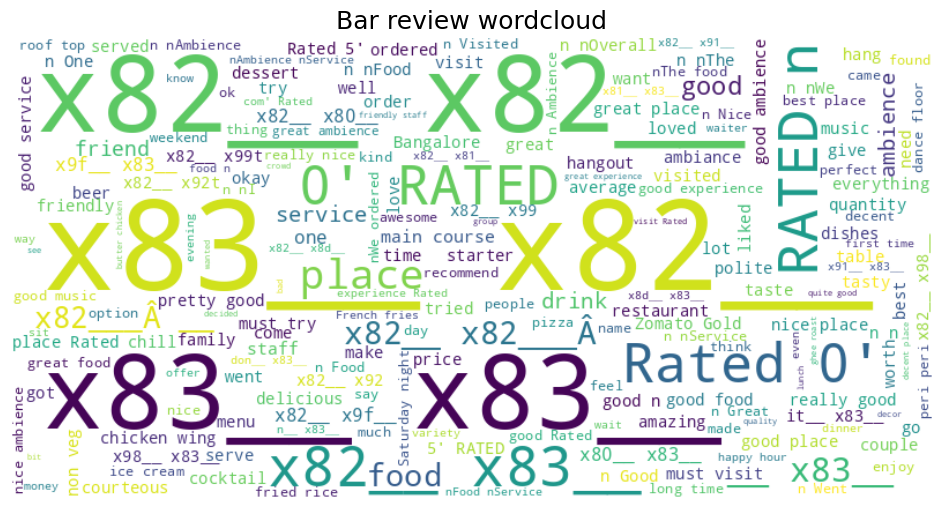

<ipython-input-1-5d43d06aaf36>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['sentiment'] = bar_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)


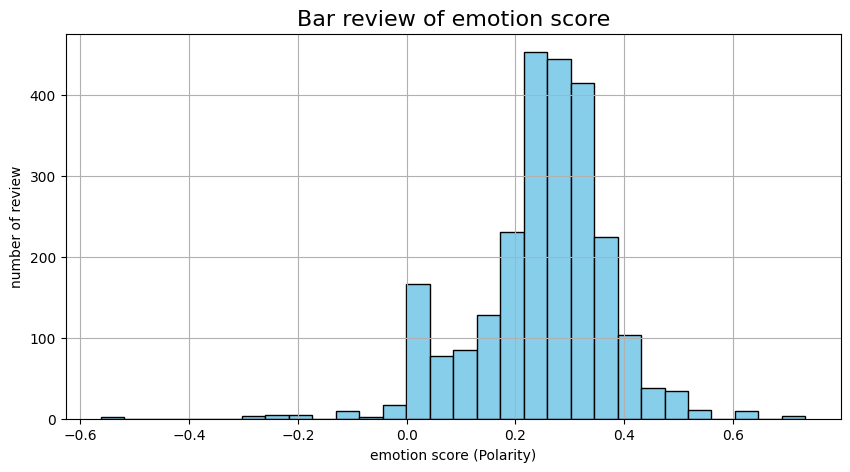

summary of emotion score:
count    2465.000000
mean        0.248181
std         0.124176
min        -0.562500
25%         0.196527
50%         0.264467
75%         0.324388
max         0.733333
Name: sentiment, dtype: float64


<ipython-input-1-5d43d06aaf36>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['sentiment_label'] = bar_df['sentiment'].apply(


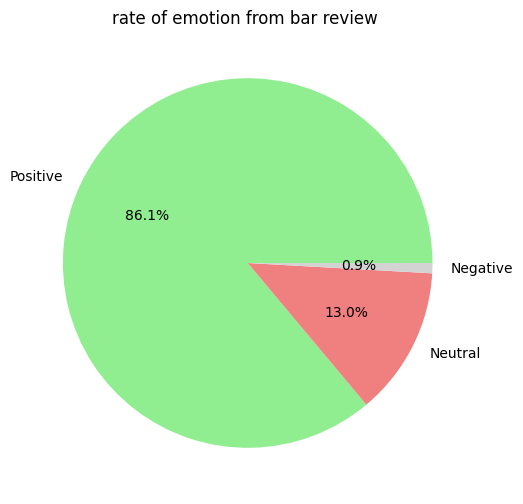

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/My Drive/zomato.csv'

# CSV 불러오기
df = pd.read_csv(file_path, encoding='latin1')

# 'Bar' 관련 레스토랑만 필터링
bar_df = df[df['rest_type'].astype(str).str.contains('Bar', na=False)]

# 리뷰 컬럼 사용 (컬럼명이 다르면 print(df.columns)로 확인해서 바꿔주세요)
bar_reviews = bar_df['reviews_list'].dropna().astype(str)

# 술 관련 키워드 필터링
import re
keywords = ['alcohol', 'drink', 'beer', 'wine', 'cocktail', 'whiskey', 'rum']
alcohol_reviews = bar_reviews[bar_reviews.str.contains('|'.join(keywords), case=False)]
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 결합
text_data = ' '.join(alcohol_reviews)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# 시각화 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bar review wordcloud', fontsize=18)
plt.show()
from textblob import TextBlob

# 감정 점수 계산 (TextBlob: -1.0 ~ +1.0)
bar_df['sentiment'] = bar_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 5))
bar_df['sentiment'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Bar review of emotion score', fontsize=16)
plt.xlabel('emotion score (Polarity)')
plt.ylabel('number of review')
plt.grid(True)
plt.show()
# 평균, 중간값, 최댓값, 최솟값
print("summary of emotion score:")
print(bar_df['sentiment'].describe())

# 긍정/부정 비율 간단 분류
bar_df['sentiment_label'] = bar_df['sentiment'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)

# 비율 시각화
bar_df['sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title('rate of emotion from bar review ')
plt.ylabel('')
plt.show()

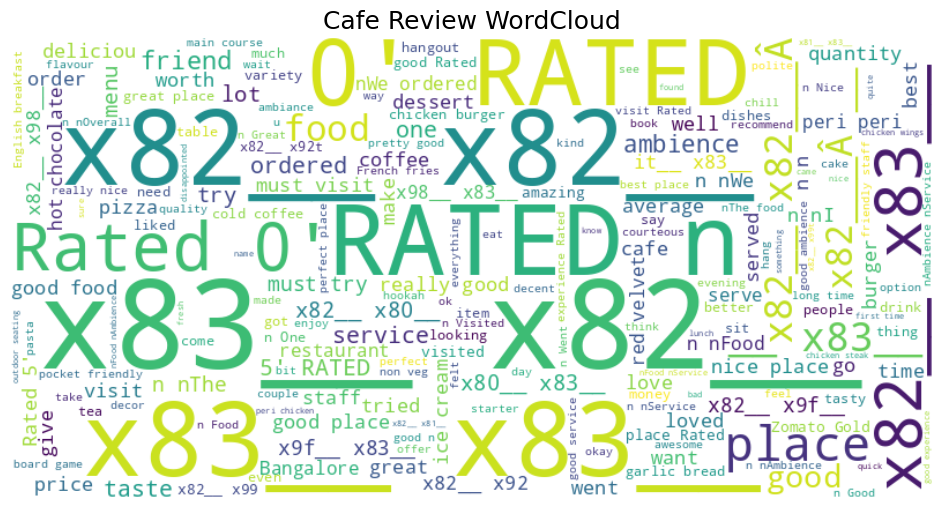

<ipython-input-5-e9fddeee7b99>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df['sentiment'] = cafe_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)


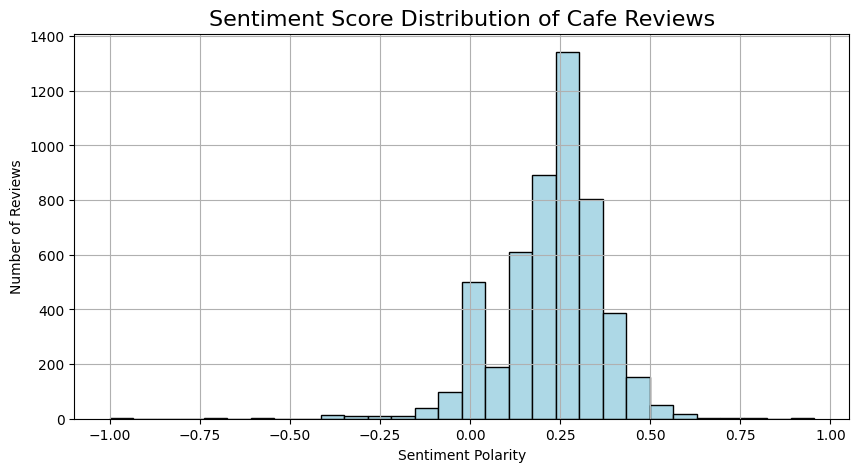

<ipython-input-5-e9fddeee7b99>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df['sentiment_label'] = cafe_df['sentiment'].apply(


summary of emotion score:
count    5142.000000
mean        0.226746
std         0.144429
min        -1.000000
25%         0.156369
50%         0.248016
75%         0.312117
max         0.955000
Name: sentiment, dtype: float64


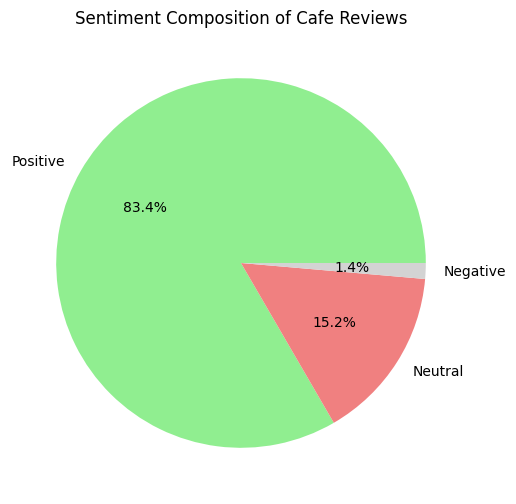

In [ ]:

# 'Cafe'가 포함된 레스토랑 필터링
cafe_df = df[df['rest_type'].astype(str).str.contains('Cafe', case=False, na=False)]

# 리뷰 데이터 추출
cafe_reviews = cafe_df['reviews_list'].dropna().astype(str)

# 카페 관련 키워드 중심 필터링 (optional)
cafe_keywords = ['coffee', 'latte', 'cappuccino', 'ambience', 'quiet', 'brunch']
cafe_focus_reviews = cafe_reviews[cafe_reviews.str.contains('|'.join(cafe_keywords), case=False)]
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 결합
cafe_text_data = ' '.join(cafe_focus_reviews)

# 워드클라우드 생성
cafe_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cafe_text_data)

# 시각화 출력
plt.figure(figsize=(12, 6))
plt.imshow(cafe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cafe Review WordCloud', fontsize=18)
plt.show()
from textblob import TextBlob

# 감정 점수 계산
cafe_df['sentiment'] = cafe_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 5))
cafe_df['sentiment'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Sentiment Score Distribution of Cafe Reviews', fontsize=16)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()
# 감정 라벨링: Positive / Neutral / Negative
cafe_df['sentiment_label'] = cafe_df['sentiment'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)
# 평균, 중간값, 최댓값, 최솟값
print("summary of emotion score:")
print(cafe_df['sentiment'].describe())


# 파이 차트 시각화
cafe_df['sentiment_label'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightgreen', 'lightcoral', 'lightgray']
)
plt.title('Sentiment Composition of Cafe Reviews')
plt.ylabel('')
plt.show()

🔍 Top 20 frequent words in negative reviews:
ratedn: 82
rated: 79
place: 79
food: 59
ordered: 43
be: 42
pizza: 38
quality: 36
all: 32
maggie: 32
here: 30
well: 27
or: 24
thing: 22
than: 22
served: 21
cheese: 20
anything: 18
one: 18
chicken: 18
💬 Example of most negative reviews:

1. [('Rated 1.0', "RATED\n  I went by the rating and ordered a pizza , there are pizza dough ketchup and pizza cheese , no concept of toppings , worst thing I've ever had in the name of pizza")]

2. [('Rated 1.0', "RATED\n  I went by the rating and ordered a pizza , there are pizza dough ketchup and pizza cheese , no concept of toppings , worst thing I've ever had in the name of pizza")]

3. [('Rated 1.0', "RATED\n  I went by the rating and ordered a pizza , there are pizza dough ketchup and pizza cheese , no concept of toppings , worst thing I've ever had in the name of pizza")]

4. [('Rated 1.0', "RATED\n  I went by the rating and ordered a pizza , there are pizza dough ketchup and pizza cheese , no concept 

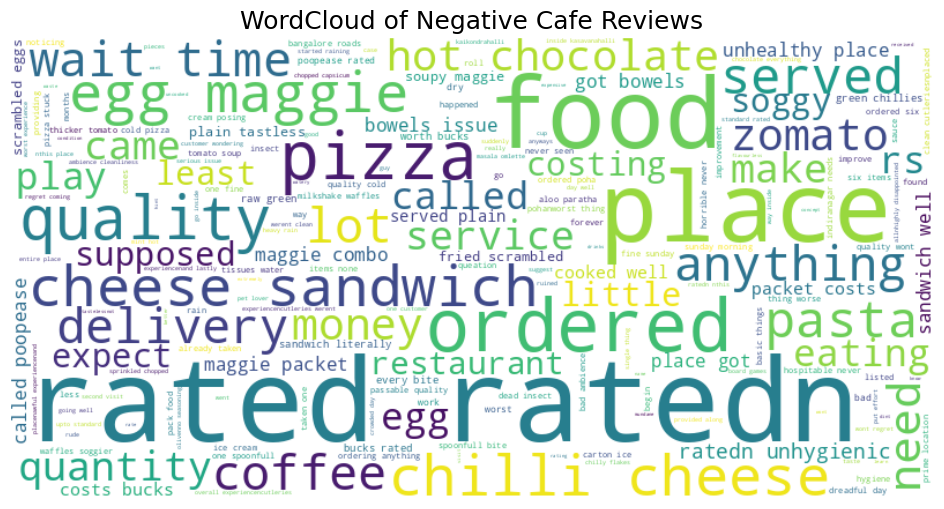

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# cafe_df['sentiment']가 이미 계산되어 있다고 가정
# 부정 리뷰만 필터링
negative_reviews = cafe_df[cafe_df['sentiment'] < -0.1]['reviews_list'].dropna().astype(str)

# 간단한 전처리 함수 (특수문자 제거 + 소문자화)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

cleaned_negative_reviews = negative_reviews.apply(clean_text)

# 단어 나누기
all_words = ' '.join(cleaned_negative_reviews).split()

# 불용어(stopwords) 제거
stopwords = set([
    'the', 'was', 'and', 'for', 'with', 'not', 'but', 'this', 'that', 'have', 'had', 'are', 'were', 'they',
    'very', 'from', 'what', 'when', 'where', 'how', 'who', 'which', 'will', 'would', 'you', 'your', 'their',
    'been', 'being', 'its', 'did', 'has', 'about', 'more', 'just', 'too', 'also', 'could', 'should', 'there',
    'my', 'we', 'our', 'as', 'on', 'at', 'it', 'i', 'me', 'is', 'in', 'to', 'of', 'a', 'an'
])

filtered_words = [word for word in all_words if word not in stopwords]

# 단어 빈도수 계산
word_freq = Counter(filtered_words)

# 상위 20개 단어 출력
print("🔍 Top 20 frequent words in negative reviews:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# 부정 리뷰 중에서 가장 감정 점수가 낮은 리뷰 5개 보기
print("💬 Example of most negative reviews:")
most_negative = cafe_df.sort_values(by='sentiment').head(5)
for i, review in enumerate(most_negative['reviews_list']):
    print(f"\n{i+1}. {review}")

neg_text = ' '.join(cleaned_negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Cafe Reviews', fontsize=18)
plt.show()

🔍 Top 20 frequent words in negative BAR reviews:
place: 125
rated: 86
ratedn: 86
like: 66
some: 57
one: 56
no: 46
so: 44
out: 40
food: 40
ever: 40
menu: 35
here: 32
shady: 32
can: 32
went: 32
if: 32
came: 32
dont: 28
go: 28
💬 Example of most negative BAR reviews:

1. [('Rated 1.0', 'RATED\n  this is a worst restaurant due to suppliers like ramesh.')]

2. [('Rated 1.0', 'RATED\n  this is a worst restaurant due to suppliers like ramesh.')]

3. [('Rated 2.0', 'RATED\n  This place is a total time waste , no good music , no proper seating, not good food .\n\nAs soon as you enter you need to pay cover charges which they will fix in the bill , but but but to your utmost shock when you sit behind to order , you seem to have nothing from the menu to be avialable.\n\nWe a group of 8 people , literally had a very bad experience at the place . Just to redeem our paid money we somehow managed and later switched the place .')]

4. [('Rated 2.0', 'RATED\n  This place is a total time waste , no good m

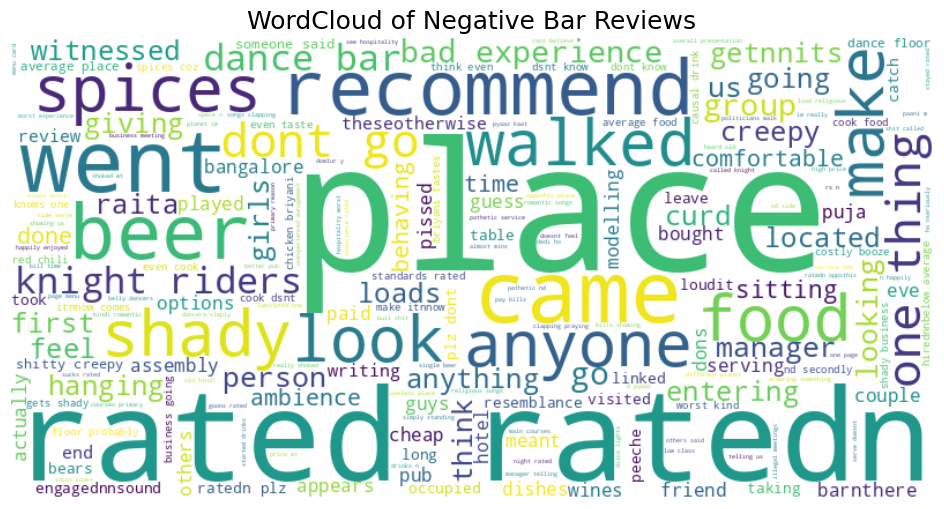

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# bar_df['sentiment'] 가 계산되어 있다고 가정
# 부정적인 리뷰만 추출
negative_reviews_bar = bar_df[bar_df['sentiment'] < -0.1]['reviews_list'].dropna().astype(str)

# 간단한 텍스트 전처리 함수 정의
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

cleaned_negative_reviews_bar = negative_reviews_bar.apply(clean_text)

# 단어 리스트로 변환
all_words_bar = ' '.join(cleaned_negative_reviews_bar).split()

# 불용어(stopwords) 제거
stopwords = set([
    'the', 'was', 'and', 'for', 'with', 'not', 'but', 'this', 'that', 'have', 'had', 'are', 'were', 'they',
    'very', 'from', 'what', 'when', 'where', 'how', 'who', 'which', 'will', 'would', 'you', 'your', 'their',
    'been', 'being', 'its', 'did', 'has', 'about', 'more', 'just', 'too', 'also', 'could', 'should', 'there',
    'my', 'we', 'our', 'as', 'on', 'at', 'it', 'i', 'me', 'is', 'in', 'to', 'of', 'a', 'an'
])
filtered_words_bar = [word for word in all_words_bar if word not in stopwords]

# 빈도 계산
word_freq_bar = Counter(filtered_words_bar)

# 상위 20개 출력
print("🔍 Top 20 frequent words in negative BAR reviews:")
for word, freq in word_freq_bar.most_common(20):
    print(f"{word}: {freq}")

# 가장 감정 점수가 낮은 리뷰 5개 보기
print("💬 Example of most negative BAR reviews:")
most_negative_bar = bar_df.sort_values(by='sentiment').head(5)
for i, review in enumerate(most_negative_bar['reviews_list']):
    print(f"\n{i+1}. {review}")


neg_bar_text = ' '.join(cleaned_negative_reviews_bar)

wordcloud_bar = WordCloud(width=800, height=400, background_color='white').generate(neg_bar_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_bar, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Bar Reviews', fontsize=18)
plt.show()

<ipython-input-1-cb4c74edc0b6>:6: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

🔍 Top 20 frequent words in positive BAR reviews:
place: 69060
good: 59458
food: 53118
service: 23093
ambience: 23072
chicken: 22405
great: 20613
really: 18335
here: 17146
nice: 16659
so: 16286
all: 14879
ordered: 14719
one: 14530
visit: 13546
be: 13500
staff: 13203
time: 11535
drinks: 11189
some: 10811
💬 Example of most positive BAR reviews:

1.  'RATED\n  Have been visiting this place for years now... perfect place for weekend drinking session... not everything on the menu is good... anyway I love visiting ths place...')

2. [('Rated 5.0', 'RATED\n  Had been here for dessert,\nNice place to hangout with friends\nCozy ambience good service\n\nI had choco mudpie - loved it they have maintained the richness in the flavour\n\nAmbience - 4.5/5\nTasteometer - 5/5\nService - 4/5')]

3.  'RATED\n  Great experience. Nice ambience

4. [('Rated 5.0', 'RATED\n  Had been here for dessert,\nNice place to hangout with friends\nCozy ambience good service\n\nI had choco mudpie - loved it they have mai

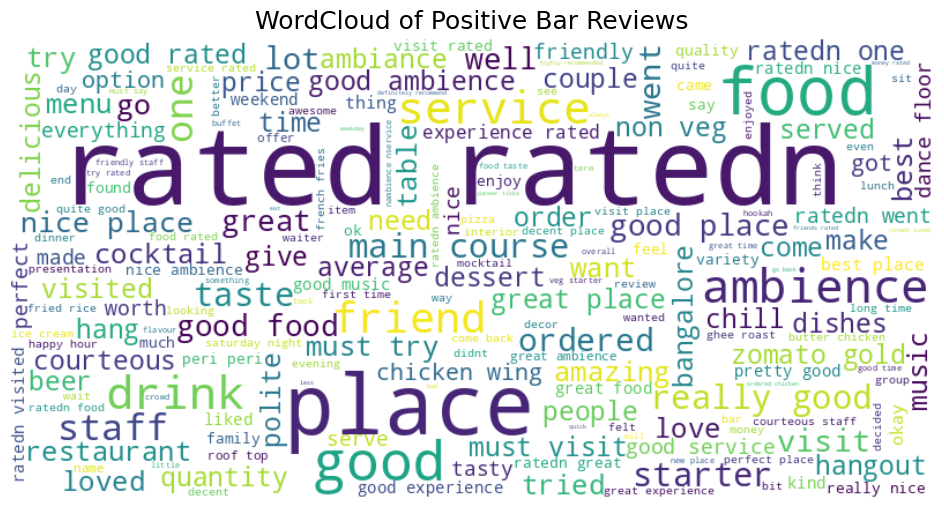

In [ ]:
import pandas as pd
from textblob import TextBlob

# 1. CSV 불러오기
file_path = '/content/drive/My Drive/zomato.csv'  # Colab 환경에서 경로
df = pd.read_csv(file_path, encoding='latin1')

# 2. Cafe 레스토랑만 필터링
bar_df = df[df['rest_type'].astype(str).str.contains('bar', case=False, na=False)].copy()

# 3. 리뷰 컬럼 전처리 및 감정 점수 계산
from textblob import TextBlob
bar_df['reviews_list'] = bar_df['reviews_list'].astype(str)
bar_df['sentiment'] = bar_df['reviews_list'].apply(lambda x: TextBlob(x).sentiment.polarity)


from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import re

# 긍정 리뷰 필터링
positive_reviews_bar = bar_df[bar_df['sentiment'] > 0.1]['reviews_list'].dropna().astype(str)

# 전처리 함수
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

cleaned_positive_reviews_bar = positive_reviews_bar.apply(clean_text)

# 단어 리스트로 변환
all_words_pos = ' '.join(cleaned_positive_reviews_bar).split()

# 불용어 제거
stopwords = set([
    'the', 'was', 'and', 'for', 'with', 'not', 'but', 'this', 'that', 'have', 'had', 'are', 'were', 'they',
    'very', 'from', 'what', 'when', 'where', 'how', 'who', 'which', 'will', 'would', 'you', 'your', 'their',
    'been', 'being', 'its', 'did', 'has', 'about', 'more', 'just', 'too', 'also', 'could', 'should', 'there',
    'my', 'we', 'our', 'as', 'on', 'at', 'it', 'i', 'me', 'is', 'in', 'to', 'of', 'a', 'an','rated', 'ratedn', 'user', 'review'
])
filtered_words_pos = [word for word in all_words_pos if word not in stopwords]


# 빈도수 계산
word_freq_pos = Counter(filtered_words_pos)

# 상위 20개 단어 출력
print("🔍 Top 20 frequent words in positive BAR reviews:")
for word, freq in word_freq_pos.most_common(20):
    print(f"{word}: {freq}")

print("💬 Example of most positive BAR reviews:")
most_positive_bar = bar_df.sort_values(by='sentiment', ascending=False).head(5)
for i, review in enumerate(most_positive_bar['reviews_list']):
    print(f"\n{i+1}. {review}")

pos_bar_text = ' '.join(cleaned_positive_reviews_bar)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_bar_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Bar Reviews', fontsize=18)
plt.show()

<ipython-input-1-d3d4b2c1d6d3>:6: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

🔍 Top 20 frequent words in positive CAFE reviews:
place: 111276
good: 81521
food: 64284
ordered: 32239
ambience: 30857
chicken: 29693
service: 28391
great: 27585
so: 26661
here: 25979
all: 25582
really: 25472
nice: 24890
one: 24573
cafe: 23680
try: 22650
be: 22372
pizza: 22139
visit: 21441
time: 20136

1.  taste is very good. Service is also awesome

2. [('Rated 4.0', 'RATED\n  I am a coffee lover. Nothing can beat filter coffee __\x83__\x83__\x82__\x83__\x83__\x82__\x82___Â°__\x83__\x83__\x82__\x82__\x83__\x82__\x82__\x9f__\x83__\x83__\x82__\x82__\x83__\x82__\x82__\x98__\x83__\x83__\x82__\x82__\x83__\x82__\x82__\x8a\nThis place is great for coffee lovers.\nJust after shopping who would not want to indulge in cup coffee.')]

3. [('Rated 4.0', 'RATED\n  I am a coffee lover. Nothing can beat filter coffee ___Â°__\x9f__\x98__\x8a\nThis place is great for coffee lovers.\nJust after shopping who would not want to indulge in cup coffee.')]

4.  excellent food with an interesting ambiance to 

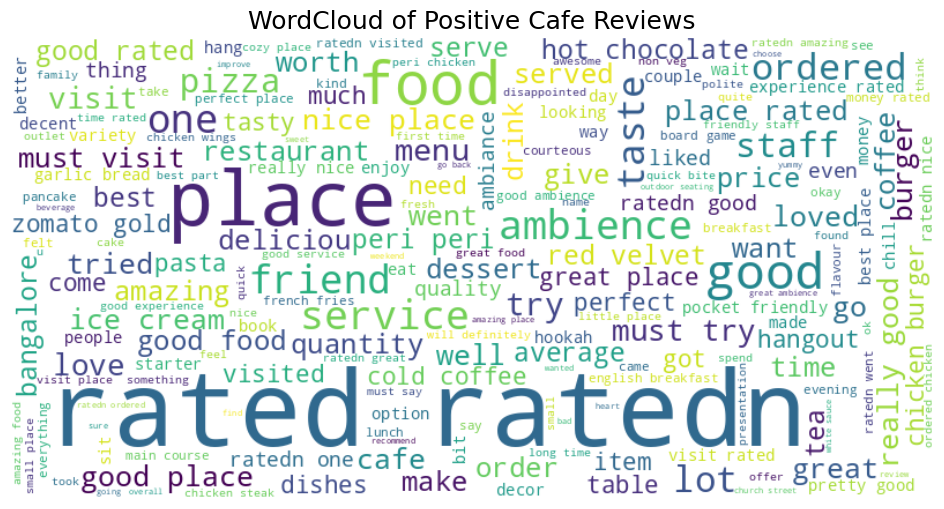

In [ ]:
import pandas as pd
from textblob import TextBlob

# 1. CSV 불러오기
file_path = '/content/drive/My Drive/zomato.csv'  # Colab 환경에서 경로
df = pd.read_csv(file_path, encoding='latin1')

# 2. Cafe 레스토랑만 필터링
cafe_df = df[df['rest_type'].astype(str).str.contains('Cafe', case=False, na=False)].copy()

# 3. 리뷰 컬럼 전처리 및 감정 점수 계산
from textblob import TextBlob
cafe_df['reviews_list'] = cafe_df['reviews_list'].astype(str)
cafe_df['sentiment'] = cafe_df['reviews_list'].apply(lambda x: TextBlob(x).sentiment.polarity)


# cafe 관련 레스토랑 필터링
cafe_df = df[df['rest_type'].astype(str).str.contains('Cafe', case=False, na=False)]

# 리뷰 컬럼에서 결측치 제거
cafe_reviews = cafe_df['reviews_list'].dropna().astype(str)

# 감정 점수 계산
from textblob import TextBlob
cafe_df['sentiment'] = cafe_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)


from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import re

# 감정 점수 기준: Positive = polarity > 0.1
positive_reviews_cafe = cafe_df[cafe_df['sentiment'] > 0.1]['reviews_list'].dropna().astype(str)

# 텍스트 정제 함수 정의
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 특수문자 제거
    text = text.lower()  # 소문자화
    return text

# 전처리된 텍스트
cleaned_positive_reviews_cafe = positive_reviews_cafe.apply(clean_text)

# 단어 리스트로 나누기
all_words_pos_cafe = ' '.join(cleaned_positive_reviews_cafe).split()

# 불용어 제거
stopwords = set([
    'the', 'was', 'and', 'for', 'with', 'not', 'but', 'this', 'that', 'have', 'had', 'are', 'were', 'they',
    'very', 'from', 'what', 'when', 'where', 'how', 'who', 'which', 'will', 'would', 'you', 'your', 'their',
    'been', 'being', 'its', 'did', 'has', 'about', 'more', 'just', 'too', 'also', 'could', 'should', 'there',
    'my', 'we', 'our', 'as', 'on', 'at', 'it', 'i', 'me', 'is', 'in', 'to', 'of', 'a', 'an','rated', 'ratedn', 'user', 'review'
])
filtered_words_pos_cafe = [word for word in all_words_pos_cafe if word not in stopwords]


# 단어 빈도수 계산
word_freq_pos_cafe = Counter(filtered_words_pos_cafe)


# 상위 20개 단어 출력
print("🔍 Top 20 frequent words in positive CAFE reviews:")
for word, freq in word_freq_pos_cafe.most_common(20):
    print(f"{word}: {freq}")

# sentiment 점수가 가장 높은 순으로 정렬 후 상위 5개 추출
most_positive_cafe = cafe_df.sort_values(by='sentiment', ascending=False).head(5)

# 각 리뷰 출력
for i, review in enumerate(most_positive_cafe['reviews_list']):
    print(f"\n{i+1}. {review}")


pos_cafe_text = ' '.join(cleaned_positive_reviews_cafe)

wordcloud_pos_cafe = WordCloud(width=800, height=400, background_color='white').generate(pos_cafe_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos_cafe, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Cafe Reviews', fontsize=18)
plt.show()

In [ ]:
import nltk

# 모든 필요한 리소스 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk

# 필요한 리소스 다운로드
nltk.download('stopwords')
nltk.download('punkt')

# 불용어 리스트
stop_words = set(stopwords.words('english'))

# 전처리 함수 정의
def extract_reviews_only(text):
    if pd.isna(text):
        return ''
    # 예: [Rated 4.0] 같은 평점 텍스트 제거
    text = re.sub(r'\[.*?\]', '', text)
    # 개행문자 제거 및 공백 정리
    return text.replace('\n', ' ').strip()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # 특수문자 제거 + 소문자
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

# Cafe Coffee Day 리뷰만 필터
ccd_df = df[df['name'].str.contains('Cafe Coffee Day', case=False, na=False)].copy()

# 전처리 적용
ccd_df['clean_review'] = ccd_df['reviews_list'].apply(extract_reviews_only).apply(clean_text)

# 감정 점수 (TextBlob의 polarity 사용)
ccd_df['sentiment_score'] = ccd_df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 감정 라벨 지정
ccd_df['sentiment_label'] = ccd_df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
)

print(ccd_df[['name', 'clean_review', 'sentiment_score', 'sentiment_label']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                 name clean_review  sentiment_score sentiment_label
23    Cafe Coffee Day                           0.0         neutral
264   Cafe Coffee Day                           0.0         neutral
648   Cafe Coffee Day                           0.0         neutral
919   Cafe Coffee Day                           0.0         neutral
1233  Cafe Coffee Day                           0.0         neutral


In [ ]:


# Step 1: 데이터 로드 및 컬럼 정리
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='latin1', low_memory=False)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: 필터링은 컬럼 정리 후에 해야 함!
df['rest_type'] = df['rest_type'].astype(str)
cafe_df = df[df['rest_type'].str.contains('cafe', case=False)].copy()
bar_df = df[df['rest_type'].str.contains('bar|pub', case=False)].copy()

# Step 3: 확인 - 컬럼 이름 점검
print("✅ cafe_df 컬럼:", cafe_df.columns.tolist())

# Step 4: 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='approx_cost(for_two_people)', y='rate', data=cafe_df)
plt.title('☕ Cafe: Cost for Two vs Rating')
plt.xlabel('Approx Cost (for Two People)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ cafe_df 컬럼: ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for_two_people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27', 'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31', 'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39', 'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'unnamed:_43', 'unnamed:_44', 'unnamed:_45', 'unnamed:_46', 'unnamed:_47', 'unnamed:_48', 'unnamed:_49', 'unnamed:_50', 'unnamed:_51', 'unnamed:_52', 'unnamed:_53', 'unnamed:_54', 'unnamed:_55', 'unnamed:_56', 'unnamed:_57', 'unnamed:_58', 'unnamed:_59', 'unnamed:_60', 'unnamed:_61', 'unnamed:_62', 'unnamed:_63', 'unnamed:_64', 'unnamed:_65', 'unnamed:_66', 'unn

<ipython-input-3-9684778dc79b>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [ ]:
import pandas as pd

# 경로 수정
file_path = '/content/drive/MyDrive/zomato.csv'

# 데이터 불러오기
zomato_df = pd.read_csv(file_path, encoding='latin1')  # 필요시 encoding='latin1' 시도

# 가격 데이터 전처리: 쉼표 제거 + 숫자로 변환
zomato_df['approx_cost(for_two_people)'] = (
    zomato_df['approx_cost(for_two_people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)

zomato_df['approx_cost(for_two_people)'] = pd.to_numeric(
    zomato_df['approx_cost(for_two_people)'], errors='coerce'
)

# 평균 가격 계산
mean_cost = zomato_df['approx_cost(for_two_people)'].mean()
print(f"approx_cost(for_two_people): {mean_cost:.2f}")

<ipython-input-1-acf5c842a21f>:7: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

KeyError: 'approx_cost(for_two_people)'

In [ ]:
import pandas as pd

# 경로 수정
file_path = '/content/drive/MyDrive/zomato.csv'

# 데이터 불러오기
zomato_df = pd.read_csv(file_path, encoding='latin1')  # 필요시 encoding='latin1' 시도

# 가격 데이터 전처리: 쉼표 제거 + 숫자로 변환
zomato_df['approx_cost(for_two_people)'] = (
    zomato_df['approx_cost(for_two_people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)

zomato_df['approx_cost(for_two_people)'] = pd.to_numeric(
    zomato_df['approx_cost(for_two_people)'], errors='coerce'
)

# 평균 가격 계산
mean_cost = zomato_df['approx_cost(for_two_people)'].mean()
print(f"approx_cost(for_two_people): {mean_cost:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-2998f88fe4ad>:7: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

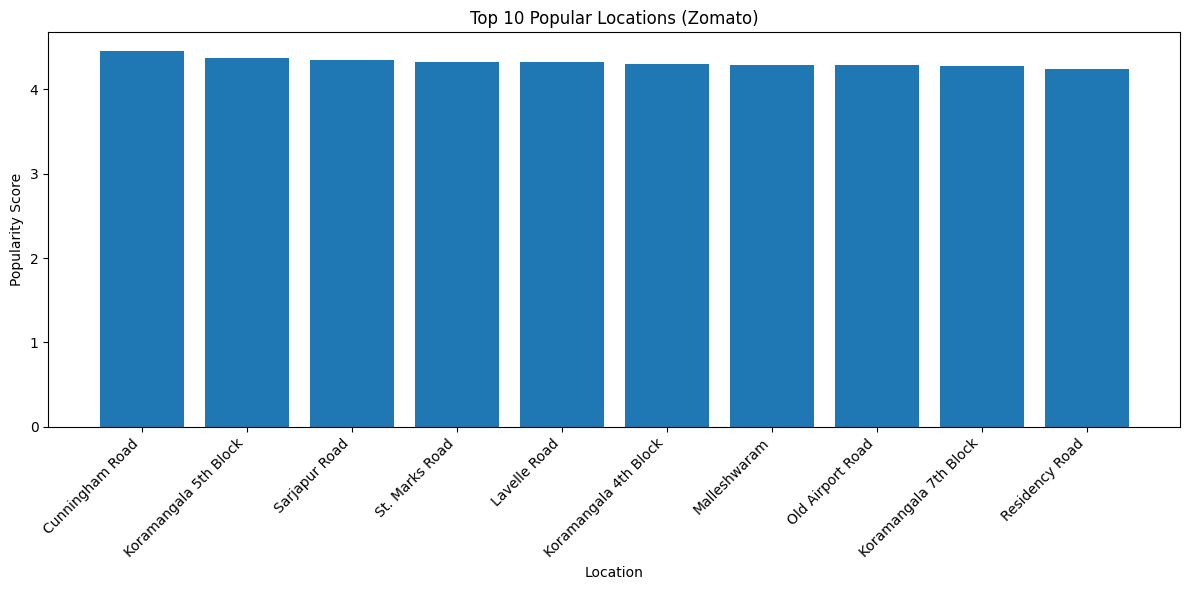

In [ ]:
# 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# 2. 파일 경로 설정 및 로드
file_path = '/content/drive/MyDrive/zomato.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 3. 전처리
df = df[['name', 'location', 'rate', 'votes']].copy()
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df.dropna(subset=['rate', 'votes', 'location'], inplace=True)

# 4. 상대 리뷰수 및 인기도 지표
location_avg_votes = df.groupby('location')['votes'].mean()
df['relative_votes'] = df.apply(lambda row: row['votes'] / location_avg_votes[row['location']], axis=1)
df['popularity_score'] = df['relative_votes'] * df['rate']

# 5. 지역별 평균 인기도 스코어
top_locations = df.groupby('location')['popularity_score'].mean().sort_values(ascending=False).head(10).reset_index()

# 6. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_locations['location'], top_locations['popularity_score'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Location")
plt.ylabel("Popularity Score")
plt.title("Top 10 Popular Locations (Zomato)")
plt.tight_layout()
plt.show()

In [ ]:


# 기본 모듈
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
# 1. CSV 불러오기
file_path = '/content/drive/My Drive/zomato.csv'  # Colab 환경에서 경로
df = pd.read_csv(file_path, encoding='latin1')

# 전처리
df = df[['location', 'cuisines', 'rate', 'votes', 'approx_cost(for two people)']].copy()
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
df = df.dropna()

# 점포 수 집계
grouped = df.groupby(['location', 'cuisines']).agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost': 'mean',
    'location': 'count'
}).rename(columns={'location': 'store_count'}).reset_index()

# 데이터 인코딩
X = pd.get_dummies(grouped[['location', 'cuisines', 'rate', 'votes', 'approx_cost']], drop_first=True)
y = grouped['store_count']

# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# 전체 예측
grouped['predicted_store_count'] = model.predict(X)

# 갭 계산
grouped['gap'] = grouped['store_count'] - grouped['predicted_store_count']

# 5th Block × American 분석
target = grouped[(grouped['location'] == 'Koramangala 5th Block') & (grouped['cuisines'].str.contains('American'))]
print(target[['location', 'cuisines', 'store_count', 'predicted_store_count', 'gap']])


<ipython-input-3-262b87181ffb>:12: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

MAE: 3.6443611793611796
RMSE: 11.725309392249757
R²: 0.08363417538311779
                   location  \
3710  Koramangala 5th Block   
3711  Koramangala 5th Block   
3762  Koramangala 5th Block   
3763  Koramangala 5th Block   
3764  Koramangala 5th Block   
3777  Koramangala 5th Block   
3786  Koramangala 5th Block   
3806  Koramangala 5th Block   
3807  Koramangala 5th Block   
3808  Koramangala 5th Block   
3809  Koramangala 5th Block   
3817  Koramangala 5th Block   
3818  Koramangala 5th Block   

                                               cuisines  store_count  \
3710            American, Continental, Fast Food, Steak            5   
3711                                American, Fast Food           10   
3762        Cafe, American, Burger, Sandwich, Beverages           15   
3763                      Cafe, American, Burger, Steak           15   
3764               Cafe, American, Continental, Italian           16   
3777             Cafe, Italian, Burger, American, Steak     

In [ ]:
print(df.columns.tolist())


['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Un

<ipython-input-4-ce67357c1bd7>:10: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

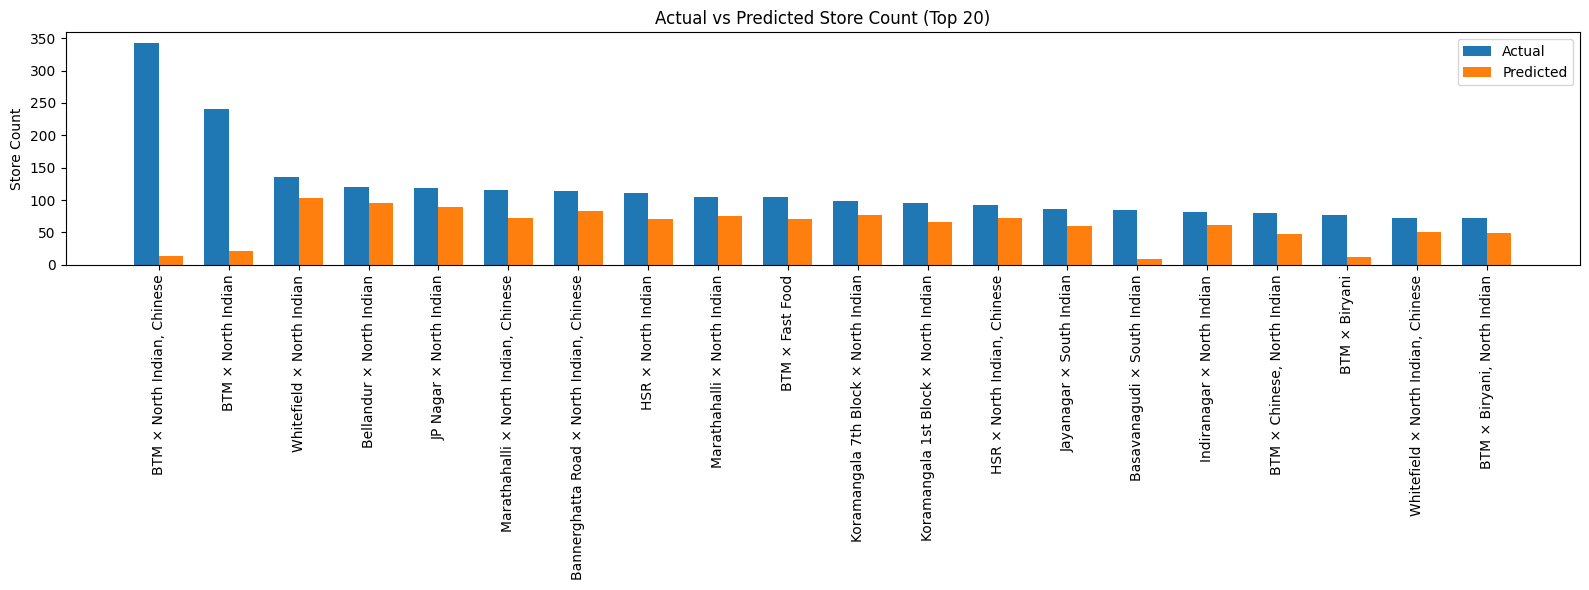

<ipython-input-4-ce67357c1bd7>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Metric', y='Value', palette='pastel')


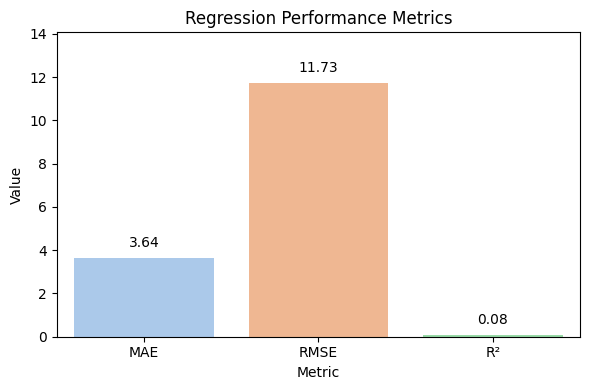

location                             cuisines  store_count  \
199                     BTM                North Indian, Chinese          342   
185                     BTM                         North Indian          241   
812            Basavanagudi                         South Indian           84   
44                      BTM                              Biryani           77   
272                     BTM  South Indian, North Indian, Chinese           67   
996               Bellandur                North Indian, Chinese           72   
4715           Marathahalli                North Indian, Chinese          116   
4507           Malleshwaram                         South Indian           54   
3767  Koramangala 5th Block         Cafe, Continental, Beverages           52   
2163                    HSR                         North Indian          111   

      predicted_store_count     gap  
199                   12.90  329.10  
185                   21.63  219.37  
812                    9.33   74.67  
44                    12.28   64.72  
272                    6.47   60.53  
996                   17.18   54.82  
4715                  73.01   42.99  
4507                  11.54   42.46  
3767                  10.34   41.66  
2163                  71.33   39.67

location      cuisines  store_count  \
1580                        Ejipura  South Indian            8   
5458                 Sadashiv Nagar  South Indian            4   
6023  Varthur Main Road, Whitefield  North Indian            3   
1322                 CV Raman Nagar  South Indian            2   
5027                   New BEL Road  South Indian           12   
2310                     Hosur Road  North Indian            8   
3070                      Jayanagar  North Indian           25   
4479                   Malleshwaram  North Indian           16   
5454                 Sadashiv Nagar  North Indian            5   
5527                    Sankey Road  North Indian            3   

      predicted_store_count    gap  
1580                  26.57 -18.57  
5458                  24.41 -20.41  
6023                  23.42 -20.42  
1322                  24.02 -22.02  
5027                  36.69 -24.69  
2310                  36.48 -28.48  
3070                  56.37 -31.37  
4479                  55.24 -39.24  
5454                  47.40 -42.40  
5527                  45.56 -42.56

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣
file_path = '/content/drive/MyDrive/zomato.csv'  # 필요 시 수정
df = pd.read_csv(file_path, encoding='latin1')

# 2️⃣
df = df[['location', 'cuisines', 'rate', 'votes', 'approx_cost(for two people)']].copy()
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
df = df.dropna()

# 3️⃣
grouped = df.groupby(['location', 'cuisines']).agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost': 'mean',
    'location': 'count'
}).rename(columns={'location': 'store_count'}).reset_index()

# 4️⃣
X = pd.get_dummies(grouped[['location', 'cuisines', 'rate', 'votes', 'approx_cost']], drop_first=True)
y = grouped['store_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 5️⃣
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6️⃣
grouped['predicted_store_count'] = model.predict(X)
grouped['gap'] = grouped['store_count'] - grouped['predicted_store_count']

# 7️⃣
top_n = 20
sorted_grouped = grouped.sort_values(by='store_count', ascending=False).head(top_n)
x_labels = sorted_grouped['location'] + ' × ' + sorted_grouped['cuisines']
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(16, 6))
plt.bar(x - width/2, sorted_grouped['store_count'], width, label='Actual')
plt.bar(x + width/2, sorted_grouped['predicted_store_count'], width, label='Predicted')
plt.xticks(x, x_labels, rotation=90)
plt.ylabel('Store Count')
plt.title('Actual vs Predicted Store Count (Top 20)')
plt.legend()
plt.tight_layout()
plt.show()

# 8️⃣
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae, rmse, r2]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics, x='Metric', y='Value', palette='pastel')
plt.title('Regression Performance Metrics')
plt.ylim(0, max(metrics['Value']) * 1.2)
for i, v in enumerate(metrics['Value']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# 9️⃣ 갭 정렬해서 출력 (양수/음수 차이 분석용)
gap_sorted = grouped[['location', 'cuisines', 'store_count', 'predicted_store_count', 'gap']].sort_values(by='gap', ascending=False)
display(gap_sorted.head(10))  # 예측보다 실제 많은 조합
display(gap_sorted.tail(10))  # 예측보다 실제 적은 조합

<ipython-input-5-39768900269a>:15: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

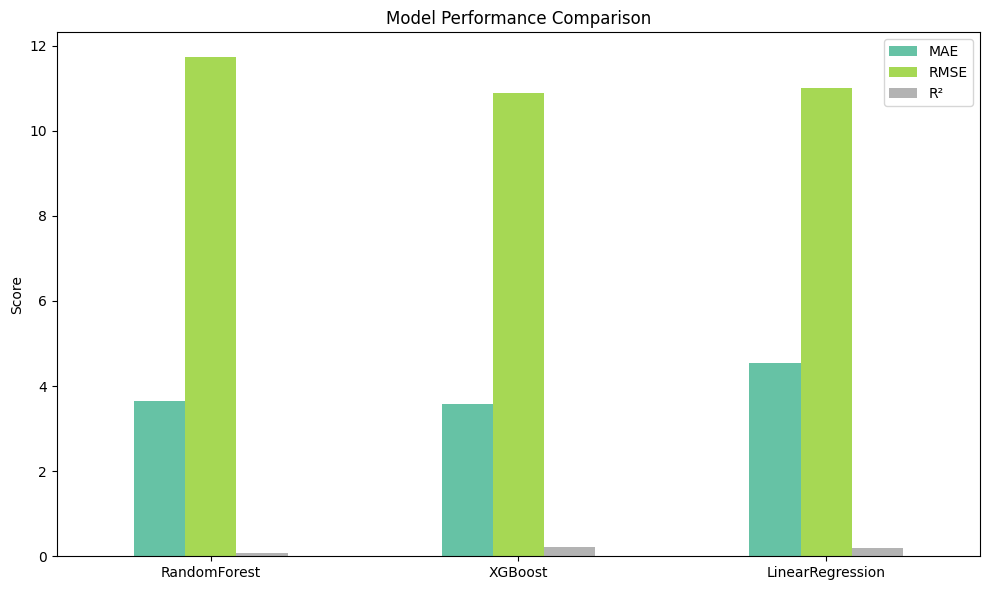

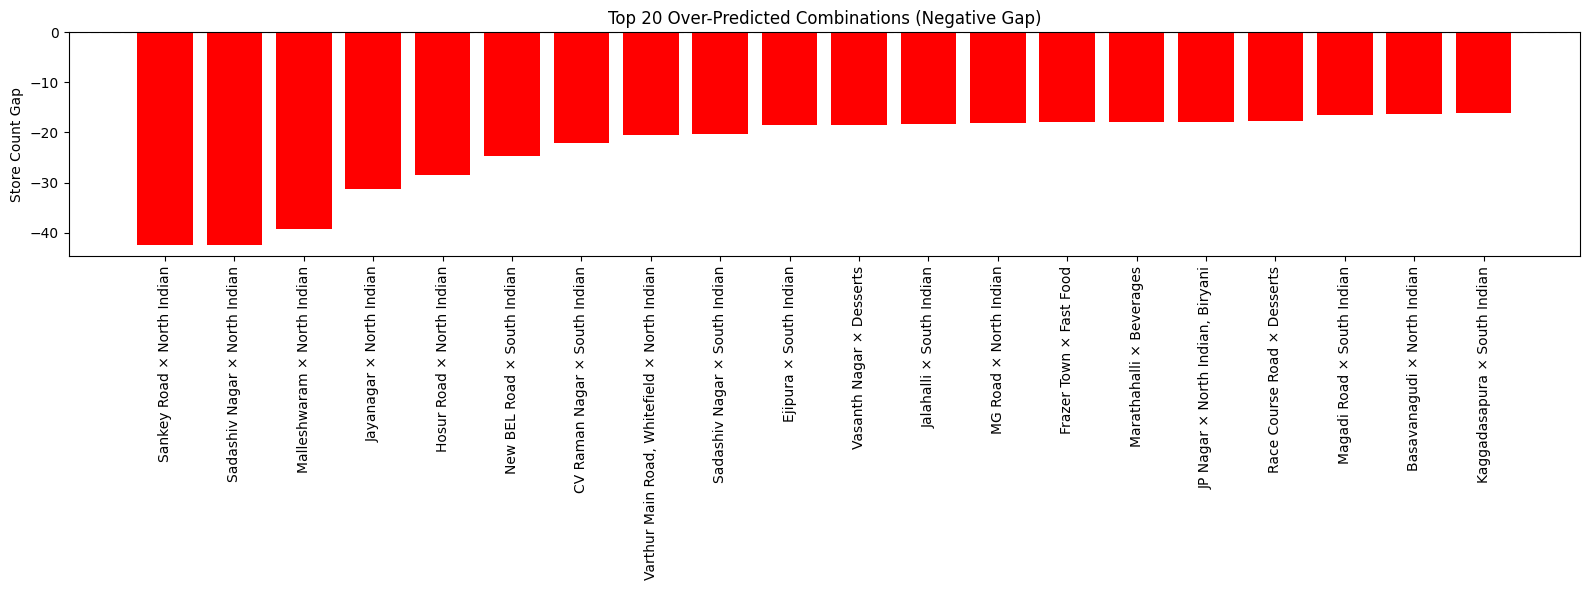

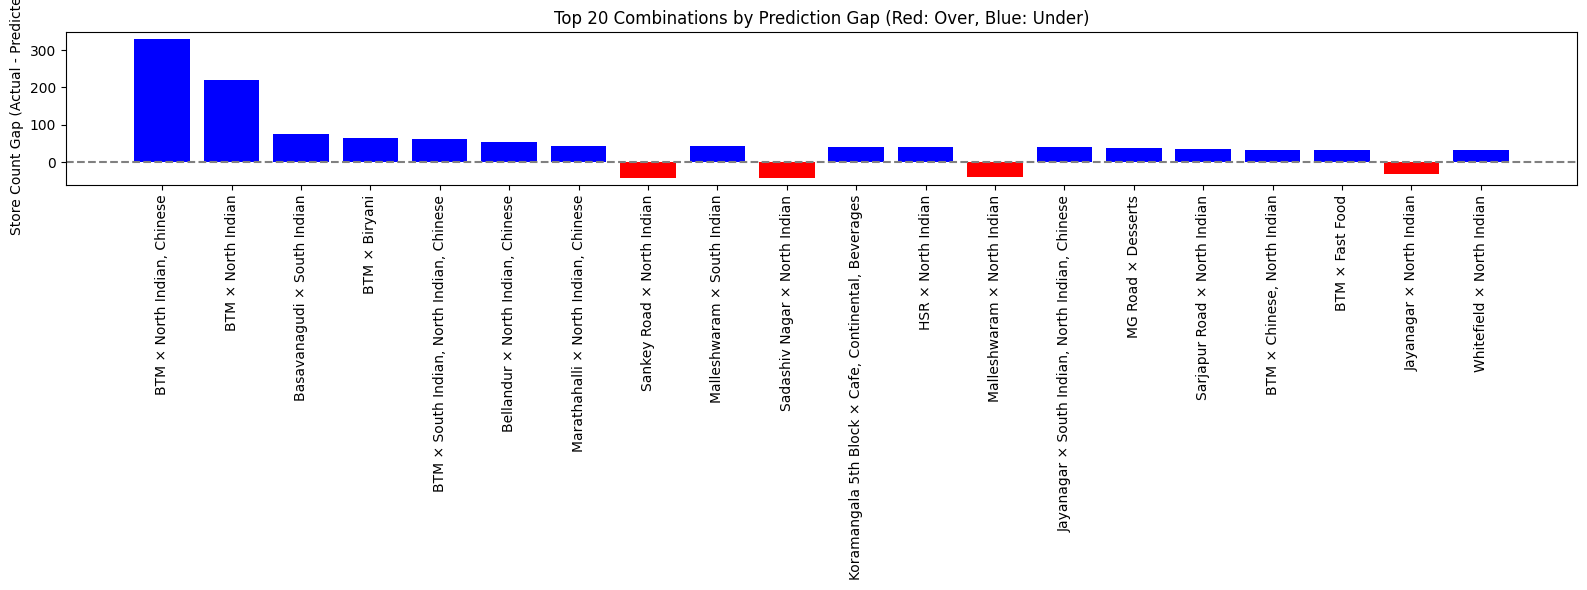

In [ ]:
# 1. 필요한 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. 데이터 로딩 및 전처리
file_path = '/content/drive/MyDrive/zomato.csv'  # 경로 확인
df = pd.read_csv(file_path, encoding='latin1')

df = df[['location', 'cuisines', 'rate', 'votes', 'approx_cost(for two people)']].copy()
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
df = df.dropna()

grouped = df.groupby(['location', 'cuisines']).agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost': 'mean',
    'location': 'count'
}).rename(columns={'location': 'store_count'}).reset_index()

X = pd.get_dummies(grouped[['location', 'cuisines', 'rate', 'votes', 'approx_cost']], drop_first=True)
y = grouped['store_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. 모델 학습 및 평가
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LinearRegression': LinearRegression()
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    results[name] = {'model': mdl, 'mae': mae, 'rmse': rmse, 'r2': r2}

# 4. 모델 비교 시각화
metrics_df = pd.DataFrame(results).T[['mae', 'rmse', 'r2']]
metrics_df = metrics_df.rename(columns={'mae': 'MAE', 'rmse': 'RMSE', 'r2': 'R²'})
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. 예측치 저장 및 갭 계산 (랜덤포레스트 기준)
rf_model = results['RandomForest']['model']
grouped['predicted_store_count'] = rf_model.predict(X)
grouped['gap'] = grouped['store_count'] - grouped['predicted_store_count']

# 6. 실제보다 예측이 더 많은 조합 상위 20개
top_overpredicted = grouped.sort_values(by='gap').head(20)
x_labels = top_overpredicted['location'] + ' × ' + top_overpredicted['cuisines']
x = np.arange(len(x_labels))
plt.figure(figsize=(16, 6))
plt.bar(x, top_overpredicted['gap'], color='red')
plt.xticks(x, x_labels, rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Store Count Gap')
plt.title('Top 20 Over-Predicted Combinations (Negative Gap)')
plt.tight_layout()
plt.show()

# 7. gap 절대값 기준 상위 20개 (양수=파랑, 음수=빨강)
top_gap = grouped.reindex(grouped['gap'].abs().sort_values(ascending=False).index).head(20)
colors = ['red' if g < 0 else 'blue' for g in top_gap['gap']]
x_labels = top_gap['location'] + ' × ' + top_gap['cuisines']
x = np.arange(len(x_labels))

plt.figure(figsize=(16, 6))
plt.bar(x, top_gap['gap'], color=colors)
plt.xticks(x, x_labels, rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Store Count Gap (Actual - Predicted)')
plt.title('Top 20 Combinations by Prediction Gap (Red: Over, Blue: Under)')
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-6aa21eb99674>:15: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

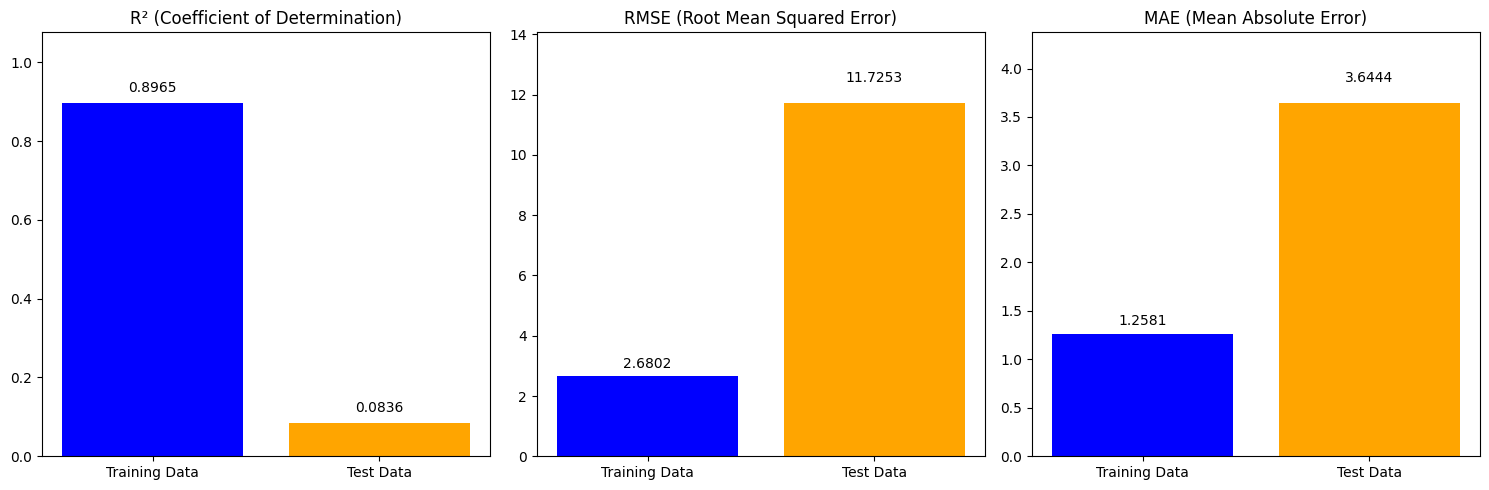

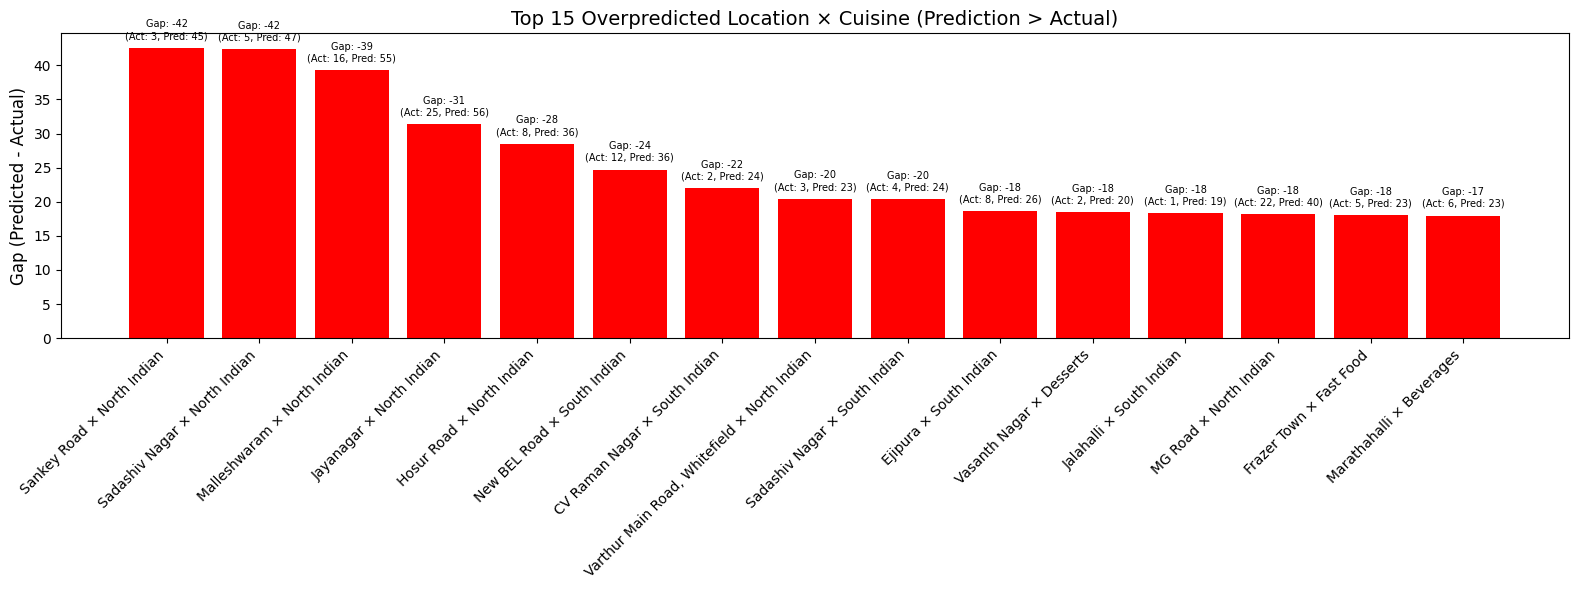

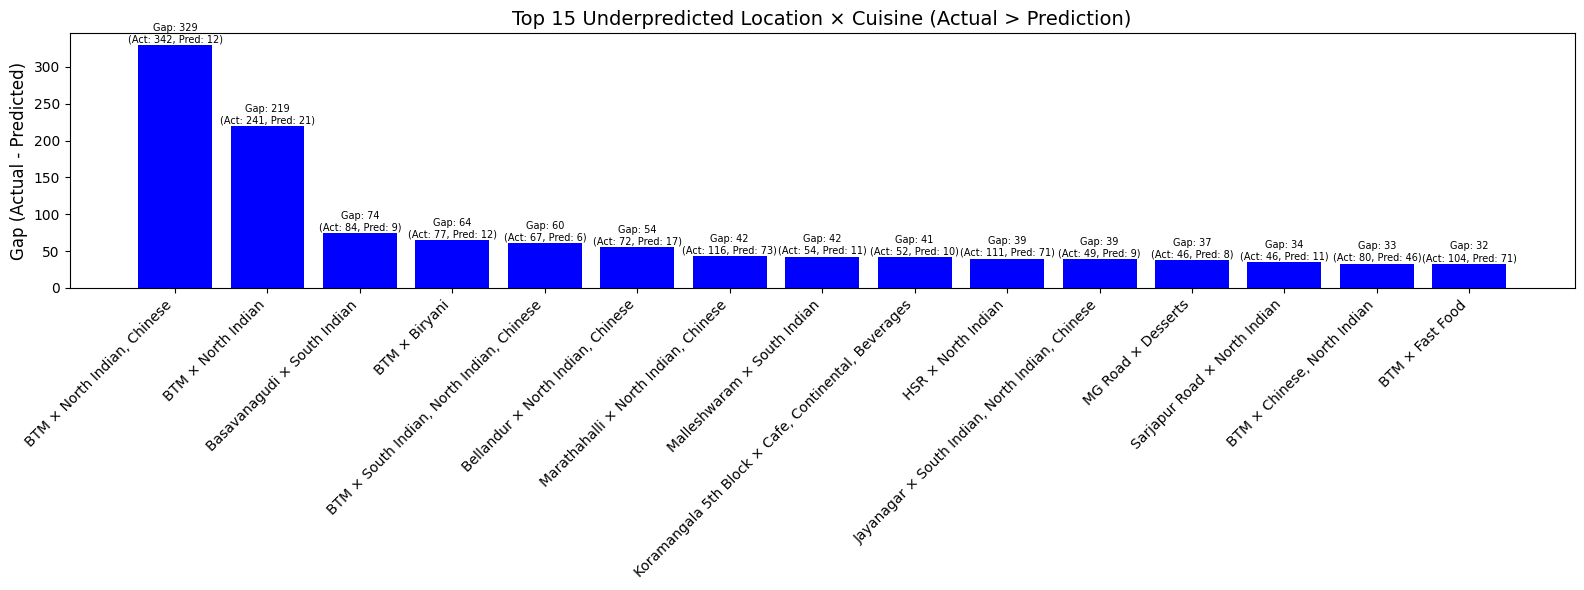

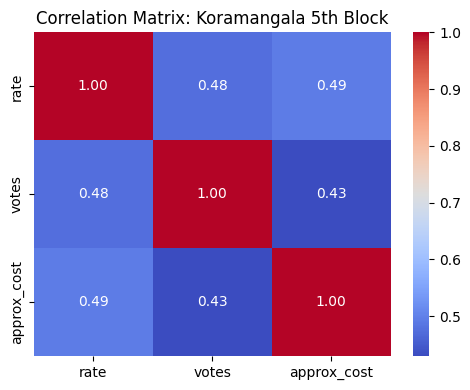

▶ Correlation Coefficients:


rate     votes  approx_cost
rate         1.000000  0.475216     0.493205
votes        0.475216  1.000000     0.429066
approx_cost  0.493205  0.429066     1.000000

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 설정
file_path = '/content/drive/MyDrive/zomato.csv'

# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 불러오기 및 전처리
df = pd.read_csv(file_path, encoding='latin1')
df = df[['location', 'cuisines', 'rate', 'votes', 'approx_cost(for two people)']].copy()
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
df = df.dropna()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 점포 수 집계
grouped = df.groupby(['location', 'cuisines']).agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost': 'mean',
    'location': 'count'
}).rename(columns={'location': 'store_count'}).reset_index()

# 모델용 데이터 준비
X = pd.get_dummies(grouped[['location', 'cuisines', 'rate', 'votes', 'approx_cost']], drop_first=True)
y = grouped['store_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 성능 지표 계산
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R²
r2_vals = [r2_train, r2_test]
axes[0].bar(['Training Data', 'Test Data'], r2_vals, color=['blue', 'orange'])
axes[0].set_title('R² (Coefficient of Determination)')
for i, val in enumerate(r2_vals):
    axes[0].text(i, val + 0.02, f'{val:.4f}', ha='center', va='bottom')
axes[0].set_ylim(0, max(r2_vals)*1.2)

# RMSE
rmse_vals = [rmse_train, rmse_test]
axes[1].bar(['Training Data', 'Test Data'], rmse_vals, color=['blue', 'orange'])
axes[1].set_title('RMSE (Root Mean Squared Error)')
for i, val in enumerate(rmse_vals):
    axes[1].text(i, val + val*0.05, f'{val:.4f}', ha='center', va='bottom')
axes[1].set_ylim(0, max(rmse_vals)*1.2)

# MAE
mae_vals = [mae_train, mae_test]
axes[2].bar(['Training Data', 'Test Data'], mae_vals, color=['blue', 'orange'])
axes[2].set_title('MAE (Mean Absolute Error)')
for i, val in enumerate(mae_vals):
    axes[2].text(i, val + val*0.05, f'{val:.4f}', ha='center', va='bottom')
axes[2].set_ylim(0, max(mae_vals)*1.2)

plt.tight_layout()
plt.show()

# Add predictions and calculate gap
grouped['predicted_store_count'] = model.predict(X)
grouped['gap'] = grouped['store_count'] - grouped['predicted_store_count']

# Filter for over-predicted combinations (prediction > actual)
over_predicted = grouped[grouped['gap'] < 0]
top10_over = over_predicted.sort_values(by='gap').head(10)

# Filter for under-predicted combinations (actual > prediction)
under_predicted = grouped[grouped['gap'] > 0]
top10_under = under_predicted.sort_values(by='gap', ascending=False).head(10)

# Visualization: Overpredicted
x_labels_over = top10_over['location'] + ' × ' + top10_over['cuisines']
x_over = np.arange(len(x_labels_over))

plt.figure(figsize=(16, 6))
bars = plt.barh(x_over, top10_over['gap'], color='red')
for i, (s, p, g) in enumerate(zip(top10_over['store_count'], top10_over['predicted_store_count'], top10_over['gap'])):
    plt.text(g - abs(g) * 0.05, i, f'Gap: {int(g)} (Actual: {int(s)}, Predicted: {int(p)})',
             va='center', ha='right', color='black', fontsize=9)

plt.yticks(x_over, x_labels_over, fontsize=10)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Gap (Actual - Predicted)', fontsize=12)
plt.title('Top 10 Overpredicted Location × Cuisine Combinations', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.show()

# Visualization: Underpredicted
x_labels_under = top10_under['location'] + ' × ' + top10_under['cuisines']
x_under = np.arange(len(x_labels_under))

plt.figure(figsize=(16, 6))
bars = plt.barh(x_under, top10_under['gap'], color='blue')
for i, (s, p, g) in enumerate(zip(top10_under['store_count'], top10_under['predicted_store_count'], top10_under['gap'])):
    plt.text(g - abs(g) * 0.05, i, f'Gap: {int(g)} (Actual: {int(s)}, Predicted: {int(p)})',
             va='center', ha='right', color='black', fontsize=9)

plt.yticks(x_under, x_labels_under, fontsize=10)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Gap (Actual - Predicted)', fontsize=12)
plt.title('Top 10 Underpredicted Location × Cuisine Combinations', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.show()

# Extract data for the target location
target_df = df[df['location'].str.lower().str.contains('5th block')]
corr_data = target_df[['rate', 'votes', 'approx_cost']].dropna()
corr_matrix = corr_data.corr()

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Koramangala 5th Block")
plt.tight_layout()
plt.show()

# Print numeric correlation matrix
print("▶ Correlation Coefficients:")
display(corr_matrix)



In [ ]:
# location의 고유값 리스트 (일부만 출력)
print("Location 예시:", df['location'].dropna().unique()[:20])

# cuisines의 고유값 리스트 (일부만 출력)
print("Cuisines 예시:", df['cuisines'].dropna().unique()[:20])

Location 예시: ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Bannerghatta Road' 'BTM'
 'Kanakapura Road' 'Bommanahalli' 'Electronic City' 'Sarjapur Road'
 'Wilson Garden' 'Shanti Nagar' 'Koramangala 5th Block']
Cuisines 예시: ['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' 'South Indian, North Indian'
 'North Indian, Rajasthani' 'North Indian'
 'North Indian, South Indian, Andhra, Chinese' 'Pizza, Cafe, Italian'
 'Cafe, Italian, Continental' 'Cafe, Mexican, Italian, Momos, Beverages'
 'Cafe' 'Cafe, Chinese, Continental, Italian' 'Cafe, Continental'
 'Cafe, Fast Food, Continental, Chinese, Momos' 'Chinese, Cafe, Italian'
 'Cafe, Italian, American' 'Cafe, French, North Indian'
 'Cafe, Pizza, Fast Food, Beverages' 'Cafe, Fast Food'
 'Italian, Fast Food, Cafe, European']
